数据集统计美国大型超市在各个州的销售和盈利情况。共9994行数据。具体数据和含义见下表。
| 变量名称        | 变量含义               |
|----------------|-----------------------|
| Row ID         | 行ID                  |
| Order ID       | 订单ID                |
| Order Date     | 订单日期              |
| Ship Date      | 运输日期              |
| Ship Mode      | 运输方式              |
| Customer ID    | 客户ID                |
| Customer Name  | 客户姓名              |
| Segment        | 客户所属的细分市场    |
| Country        | 所属国家              |
| City           | 所属城市              |
| State          | 所属州                |
| Postal Code    | 邮政编码              |
| Region         | 所属区域              |
| Product ID     | 产品ID                |
| Category       | 产品种类              |
| Sub-Category   | 产品子种类            |
| Product Name   | 产品名称              |
| Sales          | 销售额                |
| Quantity       | 产品数量              |
| Discount       | 提供的折扣            |
| Profit         | 利润                  |

（1）将‘Ship Date’与‘Order Date’转换为日期类型增加一列 ‘order_ship_time’，利用‘Ship Date’与‘Order Time’的‘差’求得，将结果保存到“PreprocessedData.csv”（5分）

（2）分析‘Discount’,‘Sales’,‘Profit’,‘Quantity',‘order_ship_time’间的相关性，用热图展示，将结果保存至“相关性热力图.png”（5分）

（3）选取‘Region’‘Category’‘Ship Mode’,‘Discount’，‘Quantity’,‘Sales’对‘Profit’进行预测，对特征‘Region’‘Category’‘Ship Mode’进行 one-hot 编码，数据集8：2切分，随机种子82。使用决策树回归模型，使用MAE,MSE,MAPE,R2对模型性能评价，并将以上参数结果保存到“决策树回归模型评价结果.csv”，格式如下（15分）
|mae|mse|mape|r2|
|-|-|-|-|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [2]:
data = pd.read_csv("exercise4/Superstore.csv", encoding="latin1")
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


#### （1）
将‘Ship Date’与‘Order Date’转换为日期类型增加一列 ‘order_ship_time’，利用‘Ship Date’与‘Order Time’的‘差’求得，将结果保存到“PreprocessedData.csv”（5分）

In [3]:
result = data.copy()
result["Order Date"] = pd.to_datetime(result["Order Date"])
result["Ship Date"] = pd.to_datetime(result["Ship Date"])
result["order_ship_time"] = result["Ship Date"] - result["Order Date"]
result

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_ship_time
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2 days
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,5 days
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,5 days
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5 days


In [4]:
result.to_csv("exercise4/PreprocessedData.csv", index = False)

#### （2）
分析‘Discount’,‘Sales’,‘Profit’,‘Quantity',‘order_ship_time’间的相关性，用热图展示，将结果保存至“相关性热力图.png”（5分）

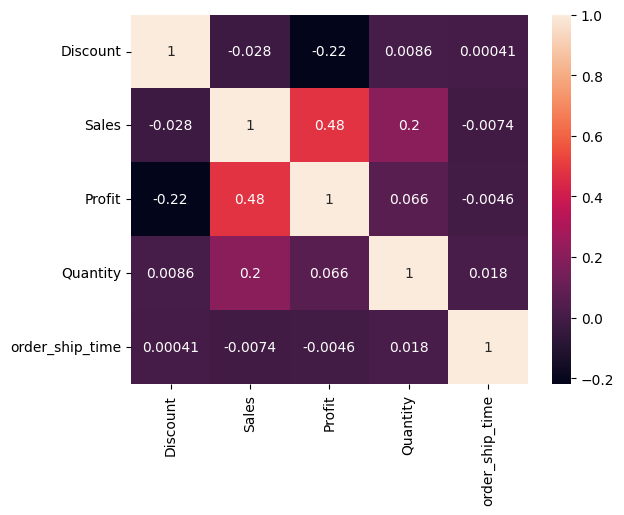

In [5]:
corr = result[["Discount", "Sales", "Profit", "Quantity", "order_ship_time"]].corr()
ax = sns.heatmap(corr, annot = True)

In [6]:
ax.get_figure().savefig("exercise4/相关性热力图.png")

#### （3）
选取‘Region’‘Category’‘Ship Mode’,‘Discount’，‘Quantity’,‘Sales’对‘Profit’进行预测，对特征‘Region’‘Category’‘Ship Mode’进行 one-hot 编码，数据集8：2切分，随机种子82。使用决策树回归模型，使用MAE,MSE,MAPE,R2对模型性能评价，并将以上参数结果保存到“决策树回归模型评价结果.csv”，格式如下（15分）
|mae|mse|mape|r2|
|-|-|-|-|

In [7]:
result2 = result[["Region", "Category", "Ship Mode", "Discount", "Quantity", "Sales", "Profit"]]
result2

,Region,Category,Ship Mode,Discount,Quantity,Sales,Profit
0,South,Furniture,Second Class,0.00,2,261.9600,41.9136
1,South,Furniture,Second Class,0.00,3,731.9400,219.5820
2,West,Office Supplies,Second Class,0.00,2,14.6200,6.8714
3,South,Furniture,Standard Class,0.45,5,957.5775,-383.0310
4,South,Office Supplies,Standard Class,0.20,2,22.3680,2.5164
...,...,...,...,...,...,...,...
9989,South,Furniture,Second Class,0.20,3,25.2480,4.1028
9990,West,Furniture,Standard Class,0.00,2,91.9600,15.6332
9991,West,Technology,Standard Class,0.20,2,258.5760,19.3932
9992,West,Office Supplies,Standard Class,0.00,4,29.6000,13.3200


In [8]:
result2 = pd.get_dummies(result2, columns = ["Region", "Category", "Ship Mode"])
result2

,Discount,Quantity,Sales,Profit,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
0,0.00,2,261.9600,41.9136,False,False,True,False,True,False,False,False,False,True,False
1,0.00,3,731.9400,219.5820,False,False,True,False,True,False,False,False,False,True,False
2,0.00,2,14.6200,6.8714,False,False,False,True,False,True,False,False,False,True,False
3,0.45,5,957.5775,-383.0310,False,False,True,False,True,False,False,False,False,False,True
4,0.20,2,22.3680,2.5164,False,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0.20,3,25.2480,4.1028,False,False,True,False,True,False,False,False,False,True,False
9990,0.00,2,91.9600,15.6332,False,False,False,True,True,False,False,False,False,False,True
9991,0.20,2,258.5760,19.3932,False,False,False,True,False,False,True,False,False,False,True
9992,0.00,4,29.6000,13.3200,False,False,False,True,False,True,False,False,False,False,True


In [9]:
x_train, x_test, y_train, y_test = train_test_split(result2.drop(["Profit"], axis = 1), result2["Profit"], test_size = 0.2, random_state = 82)
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
actual = y_test

In [10]:
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
mape = mean_absolute_percentage_error(actual, predicted)
r2 = r2_score(actual, predicted)

In [11]:
result3 = pd.DataFrame([[
    mae,
    mse,
    mape,
    r2,
]], columns = ["MAE", "MSE", "MAPE", "R2"])
result3

,MAE,MSE,MAPE,R2
0,28.929813,21104.973593,2.976443e+15,0.748727


In [12]:
result3.to_csv("exercise4/决策树回归模型评价结果.csv", index = False)